In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.groupby('sex')[['survived']].describe()

survived                                             
          count      mean       std  min  25%  50%  75%  max
sex                                                         
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

In [4]:
titanic.groupby(['sex', 'pclass'])[['survived']].aggregate('mean').unstack()

survived                    
pclass         1         2         3
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [5]:
titanic.pivot_table('survived', index='sex', columns='pclass')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [6]:
age = pd.cut(titanic['age'], [0, 25, 80])
titanic.pivot_table('survived', index=['sex', age], columns='pclass')

pclass                  1         2         3
sex    age                                   
female (0, 25]   0.928571  0.965517  0.507692
       (25, 80]  0.982456  0.888889  0.378378
male   (0, 25]   0.500000  0.277778  0.155039
       (25, 80]  0.379310  0.079365  0.145161

In [7]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', index=['sex', age], columns=['pclass', fare])

pclass                         1                                  2  \
fare            (-0.001, 14.454] (14.454, 512.329] (-0.001, 14.454]   
sex    age                                                            
female (0, 25]               NaN          0.928571         0.857143   
       (25, 80]              NaN          0.982456         0.904762   
male   (0, 25]               NaN          0.500000         0.055556   
       (25, 80]              0.0          0.397590         0.108108   

pclass                                           3                    
fare            (14.454, 512.329] (-0.001, 14.454] (14.454, 512.329]  
sex    age                                                            
female (0, 25]           1.000000         0.589744          0.384615  
       (25, 80]          0.875000         0.444444          0.315789  
male   (0, 25]           0.500000         0.147368          0.176471  
       (25, 80]          0.038462         0.134615          0.200000

In [8]:
titanic.pivot_table(index='sex', columns='pclass',
                   aggfunc={'survived': 'sum', 'fare': 'mean'})

fare                       survived        
pclass           1          2          3        1   2   3
sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

In [9]:
titanic.pivot_table('survived', index='sex', columns='pclass', margins=True, margins_name='Chance')

pclass,1,2,3,Chance
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Chance,0.629630,0.472826,0.242363,0.383838


## Case study: Americans' birthdays 

In [10]:
# !curl -O https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv

In [11]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [12]:
# add Decades
births['decade'] = (births['year'] // 10) * 10
births.pivot_table('births', index='decade', columns='gender', aggfunc=np.sum)

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Births in America distribution')

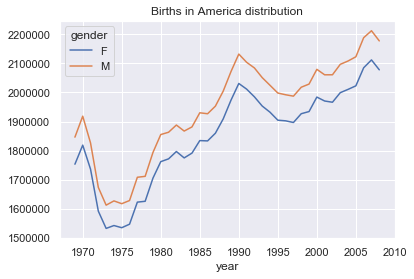

In [14]:
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc=np.sum).plot()
plt.title('Births in America distribution')

In [15]:
qu = np.percentile(births['births'], [25, 50, 75])
mu = qu[1]
sig = 0.74 * (qu[2] - qu[0])

In [16]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

In [17]:
births.index = pd.to_datetime(10000 * births.year + 
                             100 * births.month + 
                             births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

Text(0, 0.5, 'mean births by day')

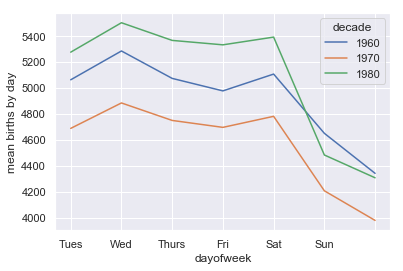

In [18]:
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                  columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [19]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [20]:
births_by_date = births.pivot_table('births', ['month', 'day'])
births_by_date.head()

births
month day          
1     1    4009.225
      2    4247.400
      3    4500.900
      4    4571.350
      5    4603.625

In [21]:
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


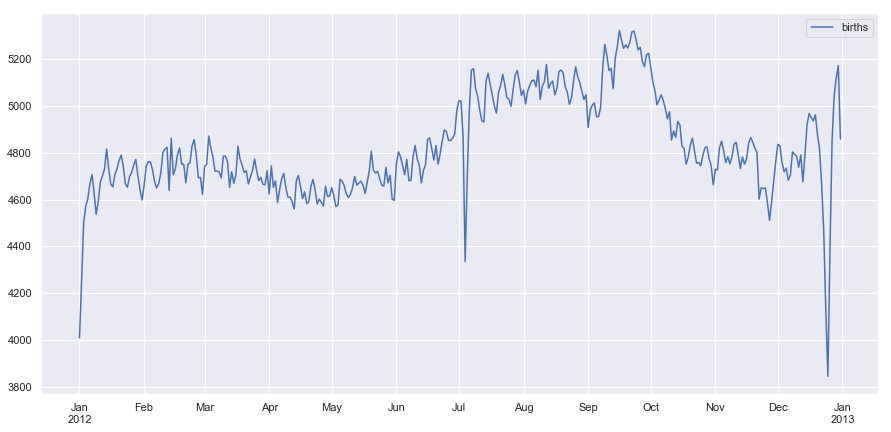

In [22]:
fig, ax = plt.subplots(figsize=(15, 7))
births_by_date.plot(ax=ax)